In [20]:
!pip install graphviz
!pip install python-graphviz
!pip install pydotplus

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=5a3fb20a28dd306b82470b2d784f799013622aca00461fab179e3873212eff36
  Stored in directory: /home/onyxia/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [17]:
#TP3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', delimiter = r"\s+", names = column_names)
y=data['MEDV']
X=data.drop('MEDV',axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


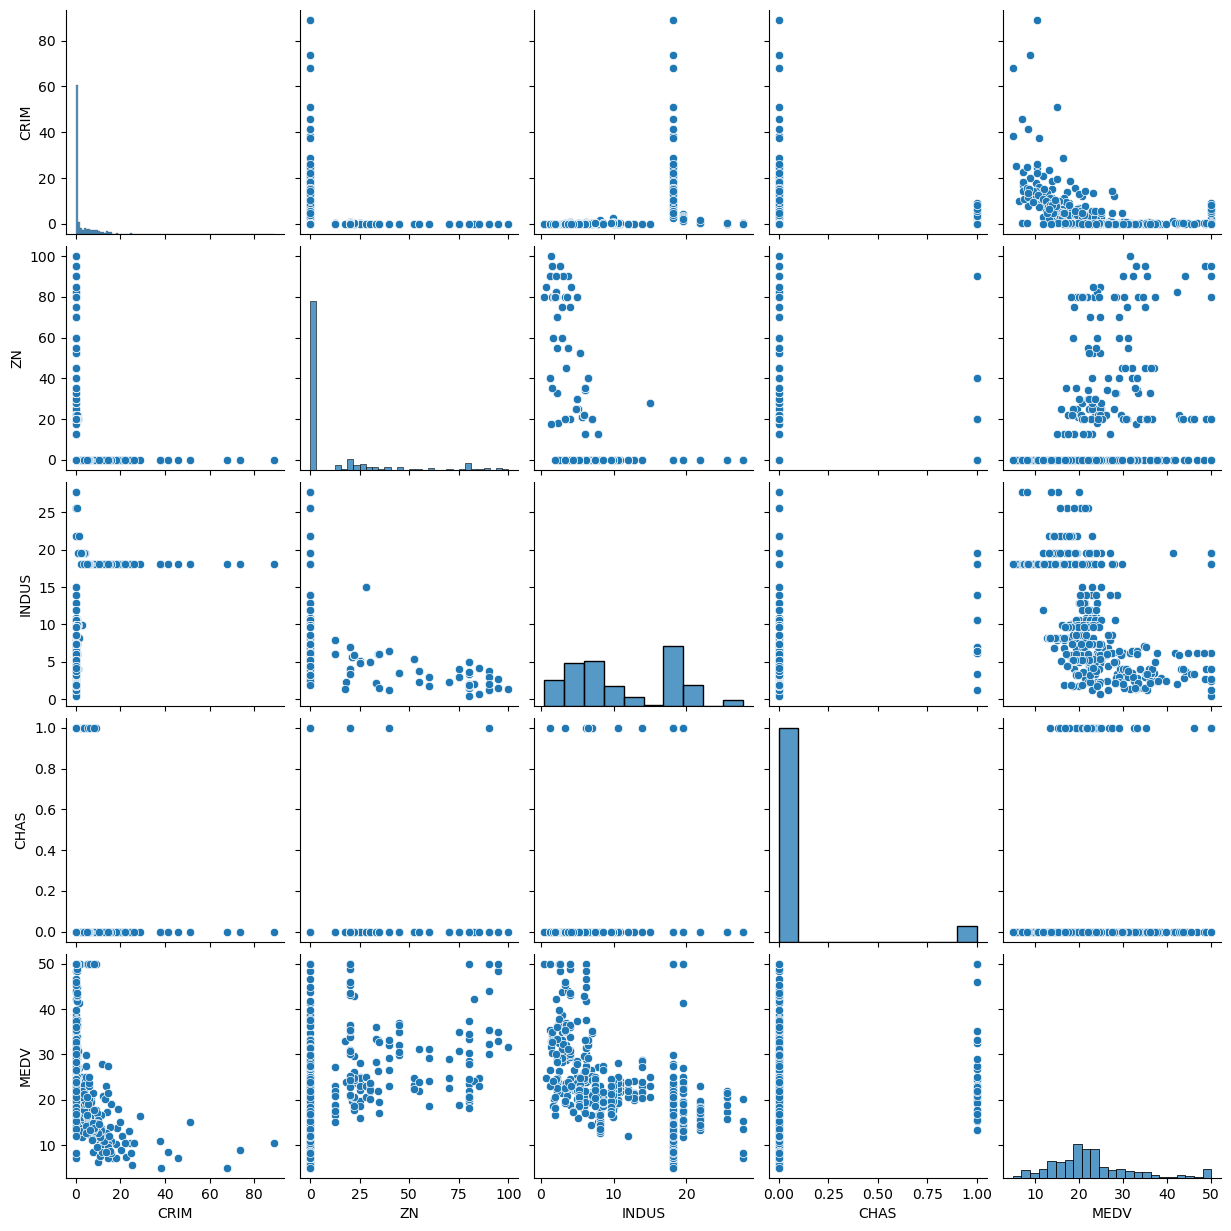

In [31]:
sns.pairplot(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']])

In [22]:
import numpy as np
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)

#Question 1. — Définir une fonction tree_summary qui prend un argument un arbre de décision entraîné et qui
affiche son score d’apprentissage, son score de test, sa profondeur et son nombre de nœuds. Appliquer cette fonction
à l’arbre dt construit ci-dessus. Commenter les résultats.
On peut limiter la profondeur de l’arbre à l’aide de l’argument max_depth.

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

In [32]:
def tree_summary(dt):
    print("score apprentissage : ", dt.score(X_train, y_train))
    print("score test : ", dt.score(X_test, y_test))
    print("profondeur : ", dt.tree_.max_depth)
    print("nb de noeuds : ", dt.tree_.node_count)
tree_summary(dt)

score apprentissage :  1.0
score test :  0.8326570877247362
profondeur :  17
nb de noeuds :  715


#Question 2. — Entraîner un arbre de décision, nommé dt2, dont la profondeur est limitée à 3. Observer ses scores
et ses caractéristiques. Commenter.
On peut visualiser l’arbre de décision dt2 de la façon suivante.

In [34]:
dt2 = DecisionTreeRegressor(max_depth = 5).fit(X_train,y_train)
tree_summary(dt2)

score apprentissage :  0.9220847096672902
score test :  0.8497355268674719
profondeur :  5
nb de noeuds :  45


In [53]:
#underfit : surapprendre est mieux que ne pas apprendre (erreur estimation vs erreur d'approx)
#overfit : si on rajoute une autre donnée (je change mon échantillon), le polynome va beaucoup changer (le modèle varie énormément)

R(f^)-F(f*) = {R(f^)-R(f* arbre3)} + {R(f* arbre3)-R(f*)} = variance + biais

- arbre de profondeur 3 : beaucoup de biais mais peu de variance (si je change mes données il ne change pas bcp
- arbre de profondeur 17 : peu de biais mais bcp de variance (en changeant mes données mon modèle change)

In [47]:
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [55]:
foo = StringIO()
export_graphviz(dt2,out_file=foo,impurity=False)
graph = graph_from_dot_data(foo.getvalue())
Image(graph.create_png())

#Question 3. — Quelles sont les variables explicatives qui interviennent dans l’arbre de décision dt2?

#Question 4. — à l’aide d’une 10-validation croisée, choisir le meilleur paramètre pour la profondeur maximale de
l’arbre de décision.

Les variables explicatives intervenant dans l'arbre sont X_12, X_5, X_7, X_10 et X_0, qui correspondent respectivement à LSTAT, RM, DIS, PTRATIO et
CRIM.

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[4,5,6,7,8]}
predictor= GridSearchCV(DecisionTreeRegressor(random_state=0),cv=10,param_grid=param_grid)
predictor.fit(X_train,y_train)
print('Paramètre sélectionné:',predictor.best_params_)
print('Score d\'apprentissage: ',predictor.score(X_train,y_train))
print('Score de test: ',predictor.score(X_test,y_test))

Paramètre sélectionné: {'max_depth': 6}
Score d'apprentissage:  0.9492494537851387
Score de test:  0.8564480113817428


#Question 5. — Définir une fonction r2_score qui prend un argument deux arrays y_true et y_predict contenant
respectivement, pour un échantillon donné, les vraies étiquettes et les étiquettes prédites par un prédicteur, et qui
revoie le score R2
correspondant.

In [60]:
def r2_score(y_true, y_predict):
    return 1-np.sum((y_true-y_predict)**2)/np.sum((y_true-np.mean(y_true))**2)

In [61]:
from sklearn.utils import resample

#Question 6. — à l’aide de la fonction resample, tirer (avec remise) à partir de l’échantillon d’apprentissage
(X_train, y_train) un autre échantillon (X_train_, y_train_) de même taille (le tirage étant avec remise, certains
exemples peuvent apparaître plusieurs fois dans le nouvel échantillon, d’autres vont en être absents). Entraîner à
l’aide de ce nouvel échantillon un arbre de décision (avec random_state=0 et les autres paramètres par défaut) et
afficher son score R2
en utilisant la fonction r2_score (on vérifiera qu’elle donne le même résultat que la fonction
.score intégrée au prédicteur).

In [65]:
X_train_,y_train_ = resample(X_train,y_train)
dt_ = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_)
print('Score de test:',r2_score(y_test,dt_.predict(X_test)))

Score de test: 0.7867797668051614


On fait k échantillon différents à partir de nos données (on tire avec remise) et on crée k arbres

ex : tirer 100 parmis 10000

X ~ N(u+b, 1) ==> 1/n∑Xi ~ N(u+b, 1/n) ==> on prend des arbres longs

#Question 7. — Construire 5 prédicteurs de la même façon qu’à la question précédente en ré-échantillonnant
(X_train_, y_train_) à chaque fois. Calculer les prédictions des prédicteurs obtenus sur l’échantillon de test.

In [80]:
dts_prediction = np.zeros((5,y_test.size))
for n in range(0,5):
    X_train_, y_train_ = resample(X_train,y_train)
    dts_prediction[n,:] = DecisionTreeRegressor(max_depth = 10, random_state=0).fit(X_train_,y_train_).predict(X_test)


#Question 8. — On considère le prédicteur défini comme la moyenne des 5 prédicteurs construits à la question
précédente. Calculer ses prédictions sur l’échantillon de test et calculer le score R2
correspondant.

In [81]:
dts_aggregated_predictions = np.mean(dts_prediction,axis=0)
print("Score R² du prédicteur agrégé:",r2_score(y_test,dts_aggregated_predictions))

Score R² du prédicteur agrégé: 0.8548221223650786
